# **Importing libraries**
The first step includes importing relevant libraries that we will be using to analyse our data.

*   Numpy is used to make mathematical calculations more accurate.
*   Pandas is used to work with file formats like csv,xls etc.
*   Matplotlib.pyplot is used to create a figure and creating a plotting area in the figure.
*   Seaborn is used to provide high level interface for drawing statistical graphics







In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing the dataset**
Our dataset file is imported and the first five values are shown using the df.head() command.The reason why we do this is to know what does the dataset contain which will be further helpful for us to analyse.
A machine learning dataset contains features and labels.Features are a part of the dataset which is used to predict the label whereas label is the value which is predicted.

In our dataset the features are :
*   Fixed acidity
*   Volatile acidity
*   Citric acid
*   Residual sugar
*   Chlorides
*   Free Sulphur dioxide
*   Total sulphur dioxide
*   Density
*   Ph
*   Sulphates
*   Alcohol


The label is quality.















In [3]:
df=pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We use the below command to see a detailed version of dataset specifying its data types.Here, in our dataset all the features are float and the label is integer.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **Checking for null values**
Here we check for any null values present.If any, we replace it with its mean value.Fortunately ours is a beginner friendly dataset with no null values.

In [5]:
df.isnull().values.any()

False

# Correlation
Here we see the correlation between the data using a heatmap.This helps us to understand the relationship between the features.The correlation between a feature and itself is 1.The feature which contributes more for a wine to be a good quality wine is alcohol.The higher the alcohol content in the wine, the quality of the wine increases.The correlation between the alcohol content and the quality of wine in our dataset is 0.48.The feature which contributes very less is volatile acidity.


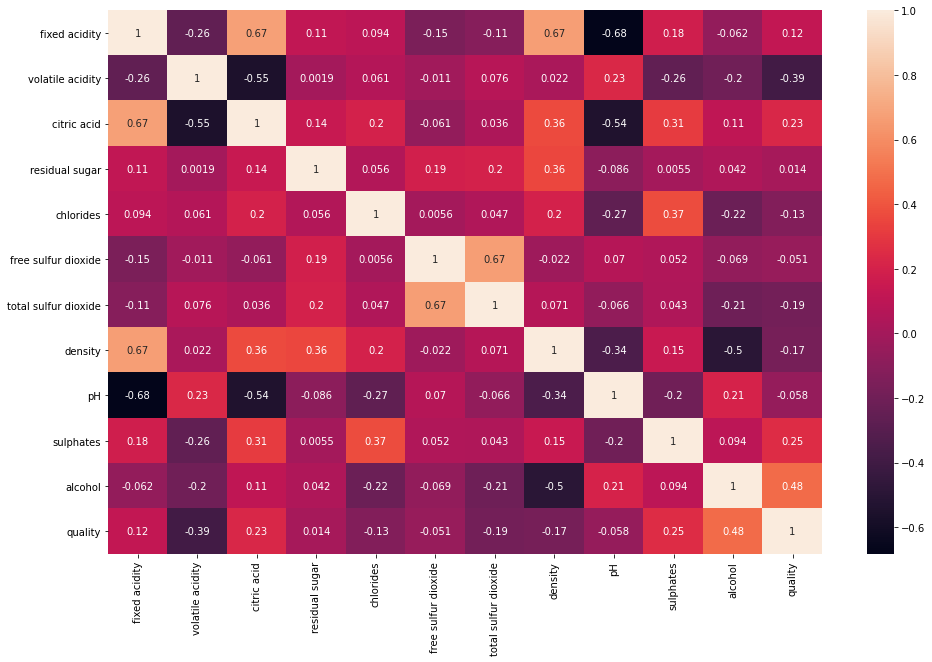

In [6]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Train test split**
The dataset is divided into trained data and test data.Here 80% if the data is trained and 20% is the test data. We store the label i.e quality in 'y' and the features in 'x'.We use the trained data to train our model to predict the label.The test data is used to verify the predicted data by the model.


In [7]:
from sklearn.model_selection import train_test_split
x=df.drop('quality',axis=1)
y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Random forest classifier
Random forests are an ensemble learning technique that builds a decision tree.It involves creating multiple decision trees and randomly selecting a subset of variables at each step of the decision tree.The model then selects the mode of all of the predictions of each decision tree.By relying on a majority wins model,it reduces the risk of error from an individual tree.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print(classification_report(y_test,pred_rf))
cross_val=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=10)
print(cross_val.mean())



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.75      0.76      0.75       132
           6       0.63      0.74      0.68       127
           7       0.61      0.48      0.53        42
           8       0.00      0.00      0.00         8

    accuracy                           0.67       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320

0.6880659448818898


# Decision tree classifier
Decision tree are used in operations research,strategic planning and machine learning.Each square above is called a node.The last nodes of the decision tree where the decision is made are called the leaves of the tree.The more the nodes we have,the more accurate is the decision tree will be.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print(classification_report(y_test,pred_dt))
cross_val=cross_val_score(estimator=dt,X=x_train,y=y_train,cv=10)
print(cross_val.mean())


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.11      0.10         9
           5       0.71      0.75      0.73       132
           6       0.66      0.61      0.63       127
           7       0.40      0.48      0.43        42
           8       0.00      0.00      0.00         8

    accuracy                           0.62       320
   macro avg       0.31      0.32      0.32       320
weighted avg       0.61      0.62      0.61       320

0.5950110728346456


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


# Linear Regression
In linear regression,we predict scores on one variable from the scores on a second variable.The variable we are predicting is called the criterion variable and is referred to as Y.The variable we are basing our predictions on is called the predictor variable and is referred to as X.When there is only one predictor variable,the prediction method is called linear regression.In our case the predictor variable is 'quality'.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
accuracy=lr.score(x_test,y_test)
print(accuracy)

0.37075765741654887


 I hereby conclude that by comparing the accuracy of the three models i.e Random forest classifier, decision tree classifier and linear regression ,the model with the highest accuracy is random tree classifier with 67% accuracy.